# 1) Import de MNIST et initialisation

In [ ]:
# numpy sert pour les mathématiques : calculs et matrices
import numpy as np
# pandas sert pour le traitement des données avec des séries et des tableaux
import pandas as pd
# tensorflow sert pour l'apprentissage automatique
import tensorflow as tf

# matplotlib sert pour la visualisation de statistique
import matplotlib.pyplot as plt


In [ ]:
# [60000, 28,28] = 60 000 images de 28 lignes sur 28 colonnes
# coordonnée donnant une valeur de gris

class MNISTLoader:
  def __init__(self):
    self.x_train = None
    self.y_train = None
    self.x_test = None
    self.y_test = None
    self.x_train_reshaped = None
    self.x_test_reshaped = None
    self.x_train_normalized = None
    self.x_text_normalized = None


  def load_data(self):
    (self.x_train, self.y_train), (self.x_test, self.y_test) = tf.keras.datasets.mnist.load_data()
    self.x_train_reshaped = self.x_train.reshape(-1, 28*28)
    self.x_test_reshaped = self.x_test.reshape(-1, 28*28)
    self.x_train_normalized = self.x_train_reshaped / 255
    self.x_test_normalized = self.x_test_reshaped / 255


  def display_digit_distribution(self):
    # bincount calcule le nombre d'occurences non nulle
    train_counts = np.bincount(self.y_train)
    train_digits = np.nonzero(train_counts)[0]

    test_counts = np.bincount(self.y_test)
    test_digits = np.nonzero(test_counts)[0]

    # trace les graphiques de distribution
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

    ax1.bar(train_digits, train_counts[train_digits])
    ax1.set_title('Distribution des chiffres - Entraînement')
    ax1.set_xlabel('Chiffre')
    ax1.set_ylabel('Nombre d\'occurence')

    ax2.bar(test_digits, test_counts[test_digits])
    ax2.set_title('Distribution des chiffres - Test')
    ax2.set_xlabel('Chiffre')
    ax2.set_ylabel('Nombre d\'occurence')

    plt.show()


  def display_image(self,dataset,index):
    if dataset == 'train':
      image = self.x_train[index]
      label = self.y_train[index]
    elif dataset == 'test':
      image = self.x_test[index]
      label = self.y_test[index]
    else:
      raise ValueError('Invalid dataset. Choose either "train" or "test".')

    plt.imshow(image,cmap="gray")
    plt.title(f'Image {index} - Chiffre: {label}')
    plt.axis('off')
    plt.show()


  def display_digit_means(self):
    digit_means_train = []
    digit_means_test = []

    # pour chaque digit, on fait la moyenne de la valeur chaque pixel pour creer une nouvelle image
    for digit in range(10):
      digit_images_train = self.x_train[self.y_train == digit]
      digit_images_test = self.x_test[self.y_test == digit]

      digit_mean_train = np.mean(digit_images_train, axis=0)
      digit_mean_test = np.mean(digit_images_test, axis=0)

      digit_means_train.append(digit_mean_train)
      digit_means_test.append(digit_mean_test)

    # affichage des moyennes des chiffres
    fig, axs = plt.subplots(2, 10, figsize=(20, 4))

    for i in range(10):
      axs[0, i].imshow(digit_means_train[i], cmap='gray')
      axs[0, i].set_title(f'Moyenne - Chiffre {i}')
      axs[0, i].axis('off')

      axs[1, i].imshow(digit_means_test[i], cmap='gray')
      axs[1, i].set_title(f'Moyenne - Chiffre {i}')
      axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()


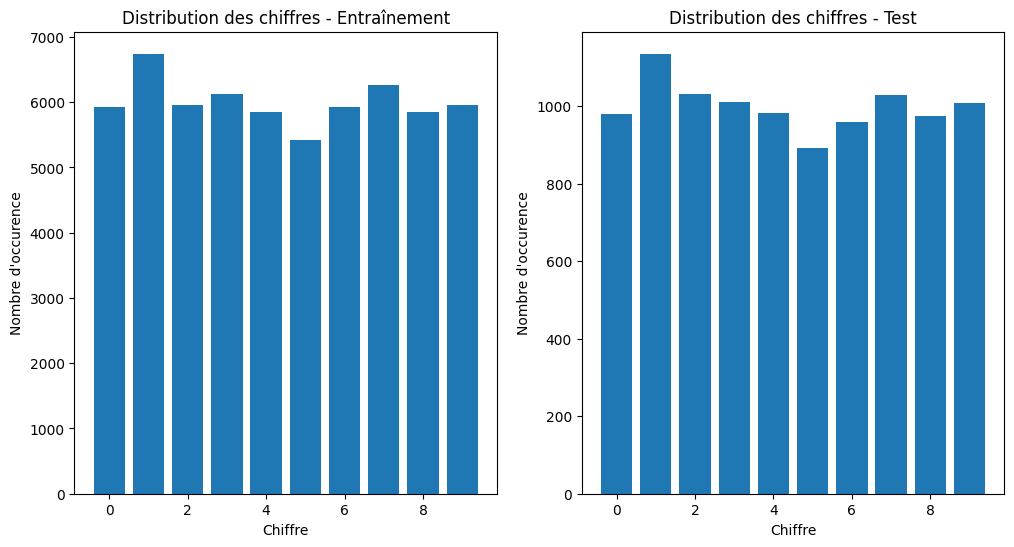

In [ ]:
loader = MNISTLoader()
loader.load_data()
loader.display_digit_distribution()


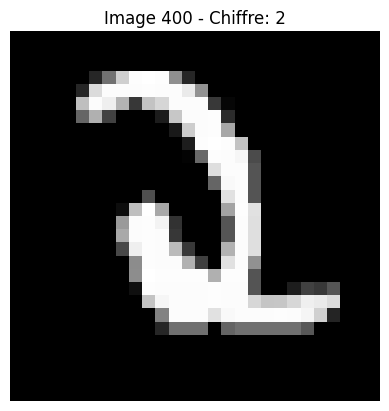

In [ ]:
loader.display_image('train', 400)

### Image moyenne par digit
#### Ligne 1 : train et ligne 2 : test

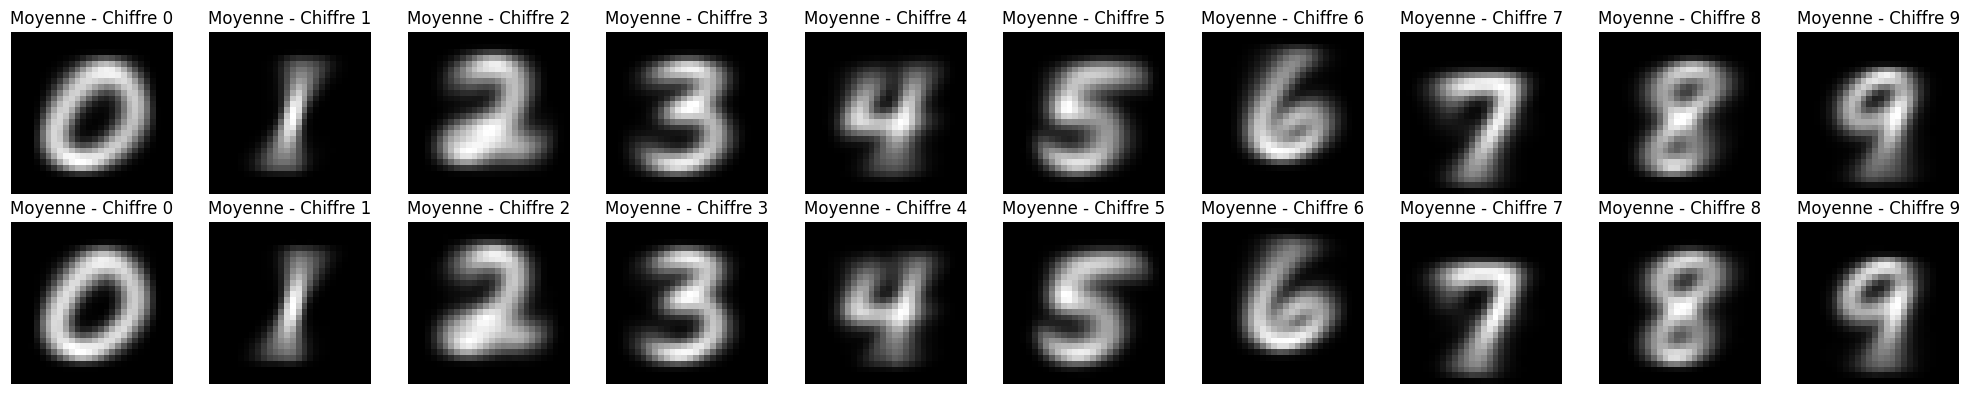

In [ ]:
loader.display_digit_means()

In [ ]:
print('Dimensions de l\'ensemble d\'apprentissage remodelé', loader.x_train_reshaped.shape)
print('Dimensions de l\'ensemble de test remodelé', loader.x_test_reshaped.shape)

Dimensions de l'ensemble d'apprentissage remodelé (60000, 784)
Dimensions de l'ensemble de test remodelé (10000, 784)


# Récapitulatif

## Chargement des données
La lib `tensorflow` nous a permis de récupérer automatiquement les données MNIST.

### MNIST présente 2 datasets
- set train [60000, 28, 28]
- set test [10000, 28, 28]

comprenant chacun :
- set x = données (images)
- set y = étiquettes (à quoi correspond une donnée = la réponse attendue)

## Statistique des données
Grâce à la lib `matplotlib`, nous avons pu afficher un graphique présentant le nombre d'occurences de chaque chiffre.
Exemple: dans le dataset train on a presque 7000 fois le digit 1.

Grâce à la lib `numpy`, nous avons pu traiter toutes les images de chiffre pour obtenir une representation générale de chaque chiffre. (Moyenne des valeurs de tous les pixels des images du digit 1)

## Remodelage des données
Nous avons remodelé les données, passant d'un tableau à 3 dimensions à un tableau à 2 dimensions. Ce processus est nécessaire car un algorithme d'apprentissage comme on va en utiliser par la suite prend une matrice en entrée et non un tableau en 3 dimensions.

Nous sommes passés de `[60000, 28, 28]` à `[60000, 784]`.

# 2) Modèles d'apprentissage et leur prédiction

## Accuracy en utilisant RandomForest


In [ ]:
# RandomForest est un modèle de scikitlearn qui utilise plusieurs arbres de décisions où chaque noeud est un else/if
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
# fit sert à l'entrainement du modele sur le dataset train
model.fit(loader.x_train_reshaped, loader.y_train)

# pour chaque image du dataset test le modele réalise une prediction
y_pred = model.predict(loader.x_test_reshaped)
# taux de réussite des prédictions en comparant avec les étiquettes (labels (réponses))
accuracy = accuracy_score(loader.y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.9696


## Accuracy en utilisant RandomForest sur des données normalisées

In [ ]:
model = RandomForestClassifier()
# cette fois on l'entraîne sur des données normalisées
model.fit(loader.x_train_normalized, loader.y_train)

y_pred = model.predict(loader.x_test_normalized)
accuracy = accuracy_score(loader.y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9707


## Accuracy en utilisant KNN (K-Nearest Neighbors)

In [ ]:
# KNeighbors est un modèle de prédiction de scikitlearn (suggestion du bootstrap)
# classe une nouvelle image en identifiant les k images d'entrainement qui s'en approchent le plus
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# n_neighbors indique le nombre de voisin les plus proches à prendre en compte lors de la prédiction
model = KNeighborsClassifier(n_neighbors=3)
model.fit(loader.x_train_reshaped, loader.y_train)

y_pred = model.predict(loader.x_test_reshaped)
accuracy = accuracy_score(loader.y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9705


## Accuracy de KNN sur des données normalisées

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(loader.x_train_normalized, loader.y_train)

y_pred = model.predict(loader.x_train_normalized)
accuracy = accuracy_score(loader.y_train, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9867166666666667


## Accuracy en testant avec le dataset d'entrainement


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(loader.x_train_reshaped, loader.y_train)

y_pred = model.predict(loader.x_train_reshaped)
accuracy = accuracy_score(loader.y_train, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9867166666666667


## Validation croisée


In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
# applique la validation croisée en 5 plis et obtient les scores de précision
scores = cross_val_score(model, loader.x_train_reshaped, loader.y_train, cv=5, scoring='accuracy')

print("Scores de précision pour chaque pli de la validation croisée:")
print(scores)

print("Précision moyenne : {:.4f}".format(scores.mean()))

Scores de précision pour chaque pli de la validation croisée:
[0.96775    0.966      0.96525    0.96375    0.97066667]
Précision moyenne : 0.9667


# 3) Questions

- Utiliser un dataset différent pour mesurer les performances de l'algorithme sert à tester le modèle sur d'autres données que celle de l'entrainement dont il connait les réponses. Cela permet de voir son taux de performance.

- Utiliser le même dataset qu'à l'apprentissage mène à un score parfait pour RandomForest mais pas pour KNN. KNN n'apprend pas, il stocke juste les données et prend les plus proches.

- Le biais correspond à un décalage et la variance correspond à la précision. Le but étant d'avoir un biais bas et une variance basse pour obtenir une précision correcte.

- La validation croisée correspond à une évaluation faite sur des données divisés en sous groupe appelés "plis" où chaque groupe sera utilisé dans une évaluation comme dataset de test. Une moyenne sera ensuite réalisée sur les résultats. Cela a pour avantage d'avoir une estimation plus fiable et une réduction du biais. A utiliser quand on veut évaluer les performances de manière plus fiable.

- La normalisation des données est plus cruciale pour les algorithmes sensibles aux échelles, comme le k-Nearest Neighbors (k-NN), car elle garantit des comparaisons équitables entre les caractéristiques en ajustant les valeurs à une même échelle, ce qui améliore la précision en réduisant les biais dus aux différences d'échelle.
En revanche, pour les forêts aléatoires, qui fonctionnent en posant des questions binaires sur les données sans calcul de distance, la normalisation a un impact minimal car les seuils de décision sont invariants à l'échelle des caractéristiques.

Testé plus haut : randomforest regresse sur des datasets normalisés alors que knn est plus accurate.

- L'accuracy permet de mesurer la performance d'un algorithme, il existe également le recall avec l'utilisation des positifs.

- L'accuracy n'est pas un bon moyen de mesurer la performance dans les cas ou nous avons besoin de trouver les 1% de cas précisément. Ici il faudrait utiliser le recall : il met l'accent sur la détection des cas positifs (les 1%).
Il existe la F-mesure qui combine l'accuracy et le recall.

- La matrice de confusion affiche les vrai positifs, les vrais négatifs, les faux positifs, les faux négatifs.



# 4) Visualisation

## Reprise du code RandomForest + affichage des erreurs par chiffres

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(loader.x_train_reshaped, loader.y_train)

y_pred = model.predict(loader.x_test_reshaped)
accuracy = accuracy_score(loader.y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9706


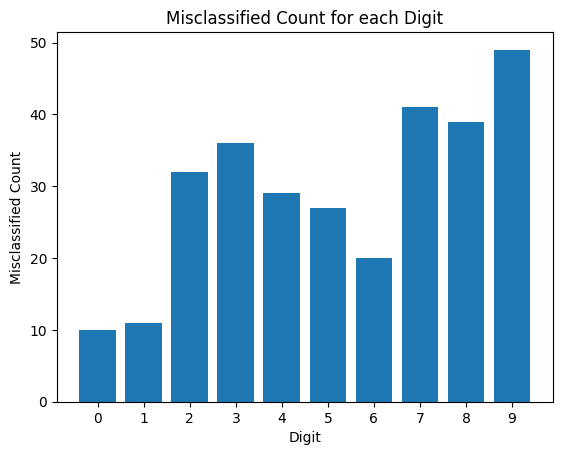

In [ ]:
misclassified_counts = np.zeros(10)

for digit in range(10):
    # Liste des index dont le label correspond au digit
    indices = np.where(loader.y_test == digit)[0]

    # Compte le nombre de prédictions mal classés pour le digit donné
    misclassified_count = np.sum(y_pred[indices] != loader.y_test[indices])

    # Store the misclassified count for the current digit
    misclassified_counts[digit] = misclassified_count

digits = np.arange(10)
plt.bar(digits, misclassified_counts)
plt.xlabel('Digit')
plt.ylabel('Misclassified Count')
plt.title('Misclassified Count for each Digit')
plt.xticks(digits)
plt.show()

## Matrice de confusion


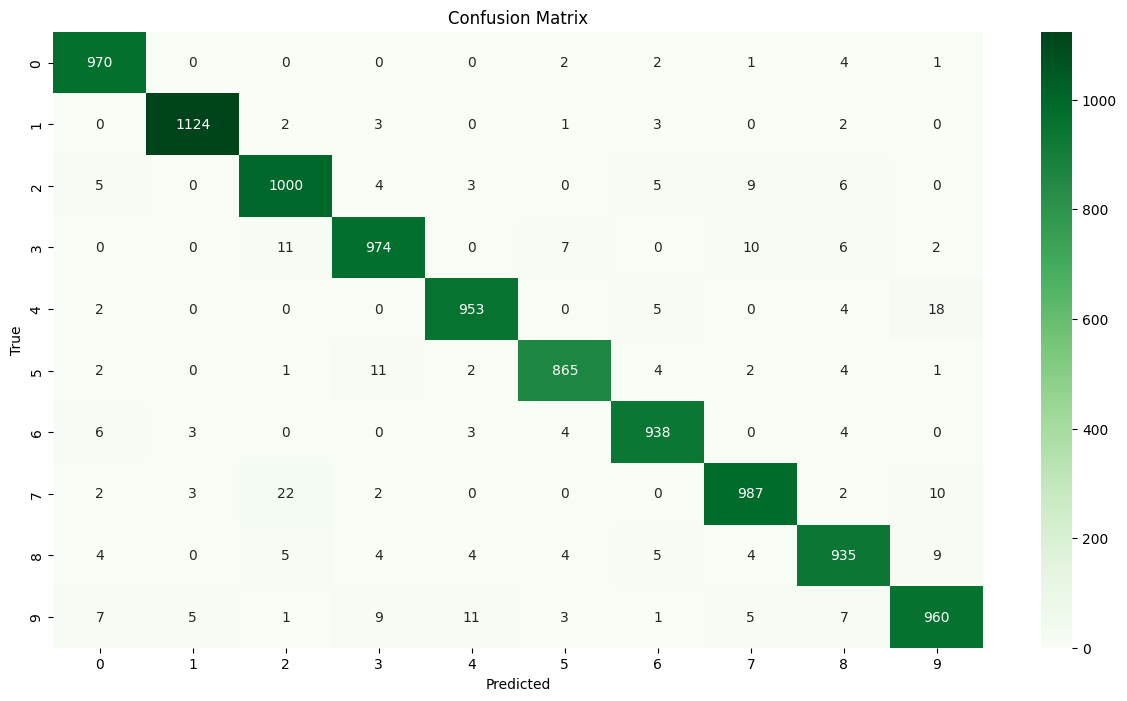

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(loader.y_test, y_pred)

plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=digits, yticklabels=digits)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 5) UL - Unsupervised learning (no label given to the model)

In [ ]:
from sklearn.cluster import KMeans

# Création de l'instance du modèle K-means
kmeans = KMeans(n_clusters=10, random_state=42)

# Ajustement du modèle aux données
kmeans.fit(loader.x_train_reshaped)

# Prédiction des clusters pour les données de test
y_pred = kmeans.predict(loader.x_test_reshaped)

# Évaluation des performances du modèle (si des étiquettes réelles sont disponibles)
accuracy = accuracy_score(loader.y_test, y_pred)
print('Accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.0319


### Partie supplémentaire

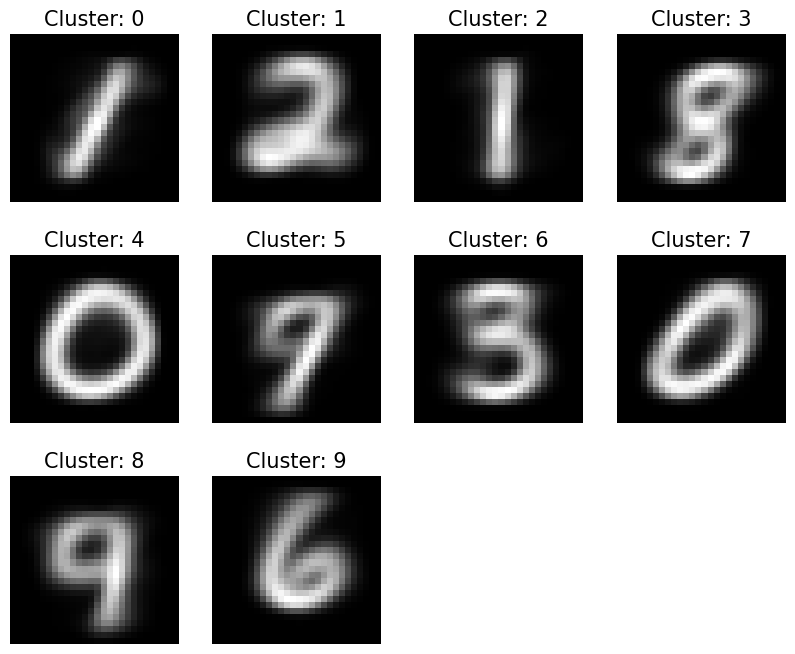

In [ ]:
# affichage des centres de clusters
centroids = kmeans.cluster_centers_

# on reshape les images en tableau en 3 dimensions pour pouvoir les afficher
centroids = centroids.reshape(10, 28, 28)
plt.figure(figsize=(10, 11))
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.title('Cluster: {}'.format(i), fontsize=15)
    plt.axis("off")
    plt.imshow(centroids[i], cmap='gray')
plt.show()

## Compte rendu Apprentissage non supervisé

Les résultats ci-dessus sont les "centres de clusters" trouvé par le modèle KMeans.

Plus simplement, nous avons précisé à la création du modèle qu'il devait diviser les données en 10 groupes (clusters).

Au-dessus se trouve les images correspondant au "centre de clusters", c'est à dire à l'élément qui, selon le modèle, est le plus représentatif de chaque cluster.

Comme on peut le voir, il n'a pas trouvé tous les clusters attendus et a séparé les labels 1, 0 et 9 en plusieurs clusters.

Dans la mesure où l'on sait exactement quelles sont les réponses attendues, l'apprentissage non supervisé n'est pas pertinent ici, mais le testé à été très intéressant.

# 6) Exercice supplémentaire - Draw (à faire en local)

In [ ]:
# lib permettant de creer une fenetre de dessin
import tkinter as tk
from PIL import Image, ImageDraw

# Création de la fenêtre principale
window = tk.Tk()

# Création de la toile pour dessiner
canvas = tk.Canvas(window, width=280, height=280, bg='white')
canvas.pack()

# Création de l'image pour stocker le dessin
image = Image.new('L', (280, 280), 255)
draw = ImageDraw.Draw(image)

# Fonction pour effacer le dessin sur la toile et réinitialiser l'image
def clear_canvas():
    canvas.delete('all')
    global image, draw
    image = Image.new('L', (280, 280), 255)
    draw = ImageDraw.Draw(image)

# Bouton pour effacer le dessin
clear_button = tk.Button(window, text='Clear', command=clear_canvas)
clear_button.pack()

# Fonction appelée lors du dessin
def draw_on_canvas(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x+10, y+10, fill='black')
    draw.rectangle([x, y, x+10, y+10], fill='black')

# Fonction appelée lors de la prédiction
def predict_digit():
    # Redimensionner l'image à la taille attendue par le modèle (28x28)
    resized_image = image.resize((28, 28))

    # Prétraitement de l'image pour l'adapter au modèle (conversion en tableau numpy, normalisation, etc.)
    preprocessed_image = preprocess_image(resized_image)

    prediction = model.predict([preprocessed_image])

    # Afficher la prédiction
    prediction_label.config(text='Prediction: ' + str(prediction[0]))

# Fonction pour prétraiter l'image avant la prédiction
def preprocess_image(image):
    # Convertir l'image en niveaux de gris
    image = image.convert('L')

    # Convertir l'image en tableau numpy
    image_array = np.array(image)

    # on inverse le noir et le blanc, car le dessin s'affiche mieux sur fond blanc mais notre modèle est entrainé sur fond noir
    # en gros sur l'image 255 correspond à du vide alors que pour notre modèle 255 c'est une case dessinée par l'utilisateur
    final_array = 255 - image_array.flatten()
    return final_array

# Bouton pour effectuer la prédiction
predict_button = tk.Button(window, text='Predict', command=predict_digit)
predict_button.pack()

# Étiquette pour afficher la prédiction
prediction_label = tk.Label(window, text='Prediction: ')
prediction_label.pack()

# Capturer les événements de dessin sur la toile
canvas.bind('<B1-Motion>', draw_on_canvas)

# Lancer l'application
window.mainloop()

TclError: no display name and no $DISPLAY environment variable

## 7) CNN - Convolution Neuronal Network

Convolution = mettre en évidence les caractéristiques de l'image.

Poolling = réduire l'image.

Enchainement des deux méthodes.



Import :

In [ ]:
# numpy sert pour les mathématiques : calculs et matrices
import numpy as np
# pandas sert pour le traitement des données avec des séries et des tableaux
import pandas as pd
# tensorflow sert pour l'apprentissage automatique
import tensorflow as tf
# matplotlib sert pour la visualisation de statistique
import matplotlib.pyplot as plt
# deep learning
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#!pip install visualkeras
import visualkeras as vk

# pour split en 80/20
from sklearn.model_selection import train_test_split

Chargement des datasets :

In [ ]:
class MNISTLoader:
  def __init__(self):
    self.x_train = None
    self.y_train = None
    self.x_test = None
    self.y_test = None

    self.x_train_reshaped = None
    self.x_test_reshaped = None

    self.x_train_normalized = None
    self.x_test_normalized = None

    self.x_train_normalized_80 = None
    self.x_val_normalized_20 = None
    self.y_train_80 = None
    self.y_val_20 = None


  def load_data(self):
    (self.x_train, self.y_train), (self.x_test, self.y_test) = tf.keras.datasets.mnist.load_data()
    self.x_train_reshaped = self.x_train.reshape(-1, 28*28)
    self.x_test_reshaped = self.x_test.reshape(-1, 28*28)
    self.x_train_normalized = self.x_train / 255
    self.x_test_normalized = self.x_test / 255

    self.x_train_normalized_80, self.x_val_normalized_20, self.y_train_80, self.y_val_20 = train_test_split(self.x_train_normalized, self.y_train, test_size=0.2, random_state=42)


loader = MNISTLoader()
loader.load_data()


Création du modèle - définition des couches :

In [ ]:
num_classes = 10
core_size = 4
model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(128, core_size, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, core_size, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 25, 25, 128)       2176      
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 12, 12, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 9, 9, 64)          131136    
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 1024)              0         
                                                                 
 dense_44 (Dense)            (None, 64)              

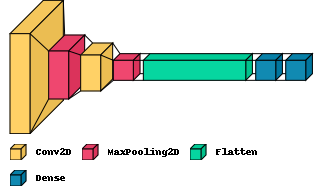

In [ ]:
vk.layered_view(model, legend='true')

Compilation :

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#logdir = "logs"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
#                                                   histogram_freq=1,
#                                                   write_images=logdir,
#                                                   embeddings_data=loader.x_train_reshaped)

Entrainement sur des données normalisées et split en 80/20 :

In [ ]:
model.fit(loader.x_train_normalized_80,
          loader.y_train_80,
          validation_data=(loader.x_val_normalized_20, loader.y_val_20),
          epochs=2)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9565

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 309s 204ms/step - loss: 0.1419 - accuracy: 0.9565 - val_loss: 0.0514 - val_accuracy: 0.9854
Epoch 2/2
1500/1500 [==============================] - 286s 191ms/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0474 - val_accuracy: 0.9855


In [ ]:
print(model.evaluate(loader.x_test, loader.y_test))

 11/313 [>.............................] - ETA: 7s - loss: 9.8252 - accuracy: 0.9773

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 17s 54ms/step - loss: 9.6527 - accuracy: 0.9792
[9.652700424194336, 0.979200005531311]


In [ ]:
y_pred = model.predict(loader.x_test_normalized)
y_pred_label = np.argmax(y_pred, axis=1)

313/313 [==============================] - 25s 80ms/step


Matrice de confusion :

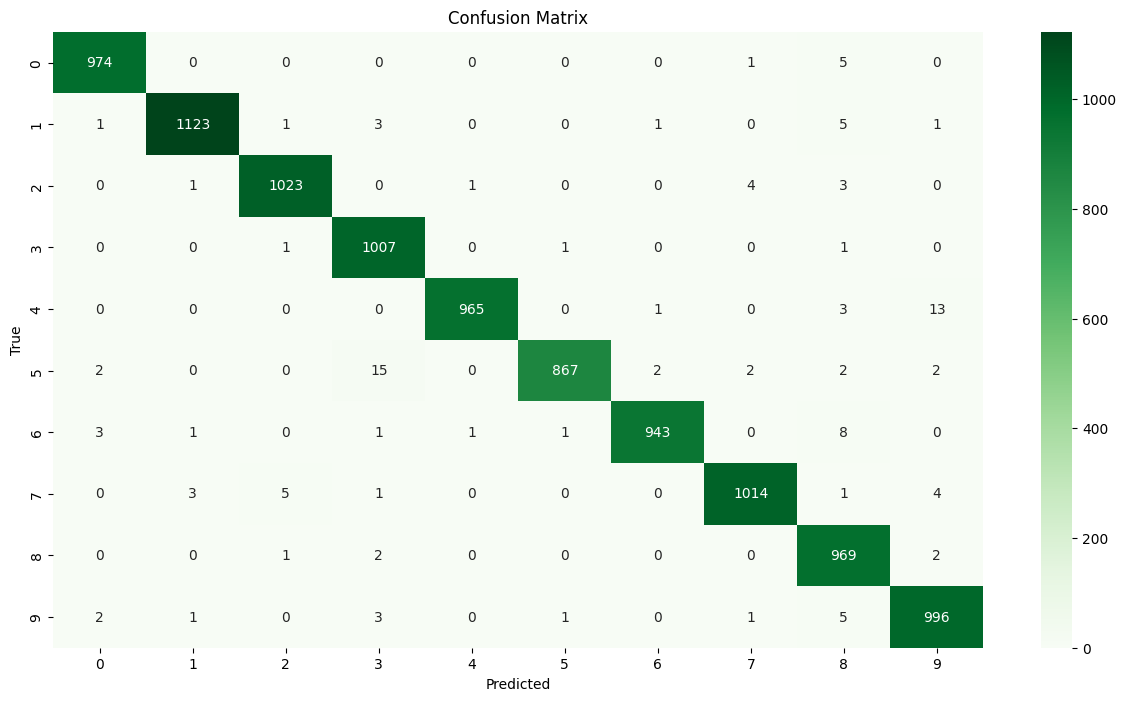

In [ ]:
from sklearn.metrics import confusion_matrix
#!pip install seaborn
import seaborn as sns

cm = confusion_matrix(loader.y_test, y_pred_label)
digits = np.arange(10)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=digits, yticklabels=digits)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Entrainement sur des données binaires :

Avec des données binaires (mettre les pixels d'images à 0 ou 1) c'est moins efficace, probablement car il y a de la perte de données (pas de pixel de gris).

## D'autres métriques :

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculer la précision, le rappel et le score F1 pour chaque classe
precision = precision_score(loader.y_test, y_pred_label, average=None)
recall = recall_score(loader.y_test, y_pred_label, average=None)
f1 = f1_score(loader.y_test, y_pred_label, average=None)

# Afficher les scores pour chaque classe
for i in range(num_classes):
    print("Classe", i)
    print("Précision :", precision[i])
    print("Rappel :", recall[i])
    print("Score F1 :", f1[i])
    print()

Classe 0
Précision : 0.9918533604887984
Rappel : 0.9938775510204082
Score F1 : 0.9928644240570846

Classe 1
Précision : 0.9946855624446412
Rappel : 0.9894273127753304
Score F1 : 0.9920494699646643

Classe 2
Précision : 0.9922405431619786
Rappel : 0.9912790697674418
Score F1 : 0.9917595734367426

Classe 3
Précision : 0.9757751937984496
Rappel : 0.997029702970297
Score F1 : 0.9862879529872673

Classe 4
Précision : 0.9979317476732161
Rappel : 0.9826883910386965
Score F1 : 0.9902514109799897

Classe 5
Précision : 0.996551724137931
Rappel : 0.9719730941704036
Score F1 : 0.9841089670828604

Classe 6
Précision : 0.9957761351636748
Rappel : 0.9843423799582464
Score F1 : 0.9900262467191602

Classe 7
Précision : 0.9921722113502935
Rappel : 0.9863813229571985
Score F1 : 0.9892682926829268

Classe 8
Précision : 0.9670658682634731
Rappel : 0.9948665297741273
Score F1 : 0.9807692307692307

Classe 9
Précision : 0.9783889980353635
Rappel : 0.9871159563924677
Score F1 : 0.9827331031080415



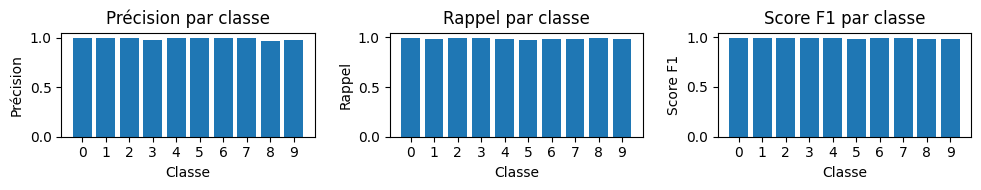

In [ ]:
# Créer un tableau de classes
classes = np.arange(num_classes)

# Créer un sous-graphique pour les scores de précision
plt.figure(figsize=(10, 2))
plt.subplot(1, 3, 1)
plt.bar(classes, precision)
plt.title('Précision par classe')
plt.xlabel('Classe')
plt.ylabel('Précision')
plt.xticks(classes)

# Créer un sous-graphique pour les scores de rappel
plt.subplot(1, 3, 2)
plt.bar(classes, recall)
plt.title('Rappel par classe')
plt.xlabel('Classe')
plt.ylabel('Rappel')
plt.xticks(classes)

# Créer un sous-graphique pour les scores F1
plt.subplot(1, 3, 3)
plt.bar(classes, f1)
plt.title('Score F1 par classe')
plt.xlabel('Classe')
plt.ylabel('Score F1')
plt.xticks(classes)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()